In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
data = pd.read_csv('Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [7]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,5000
2,5000
3,5000
4,5000
5,5000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [11]:
data.loc[data['Sentiment']<=3, 'Sentiment'] = 0
data.loc[data['Sentiment']>3, 'Sentiment'] = 1

In [12]:
stp_words = stopwords.words('english')
def clean_review(review):
  Cleanreview = " ".join(word for word in review.split() if word not in stp_words)
  return Cleanreview
  data['Review'] = data['Review'].apply(clean_review)

In [13]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


In [14]:
data['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


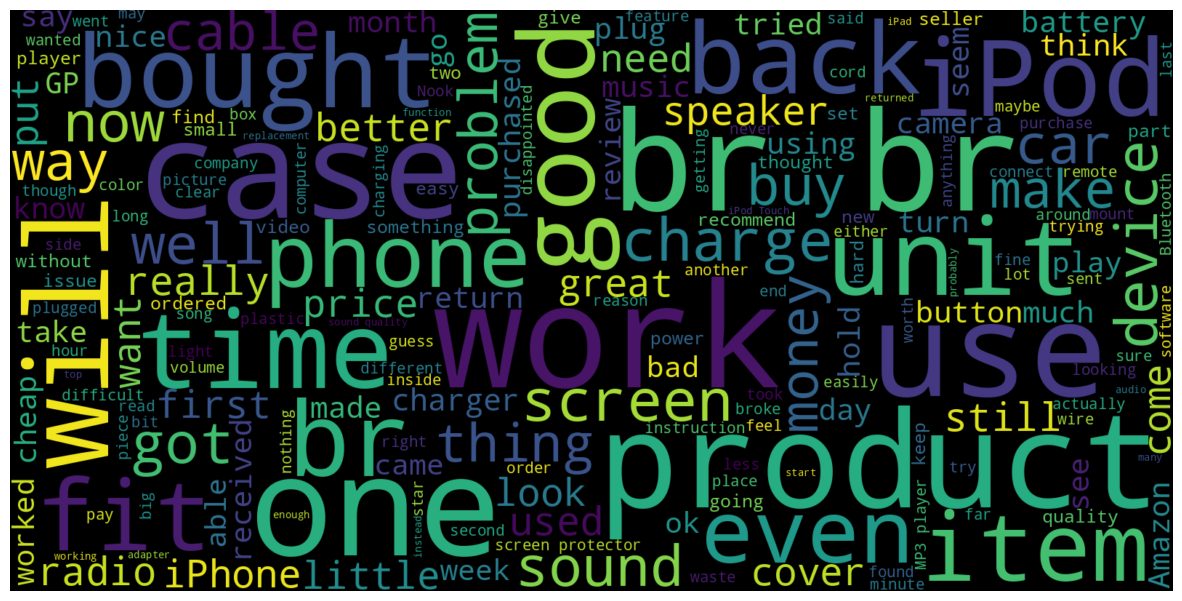

In [15]:
consolidated = ' '.join(word for word in data['Review']
[data['Sentiment']==0].astype(str))
wordcloud=WordCloud(width=1600, height=800, max_font_size=200).generate(consolidated)
plt.figure(figsize=(15,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

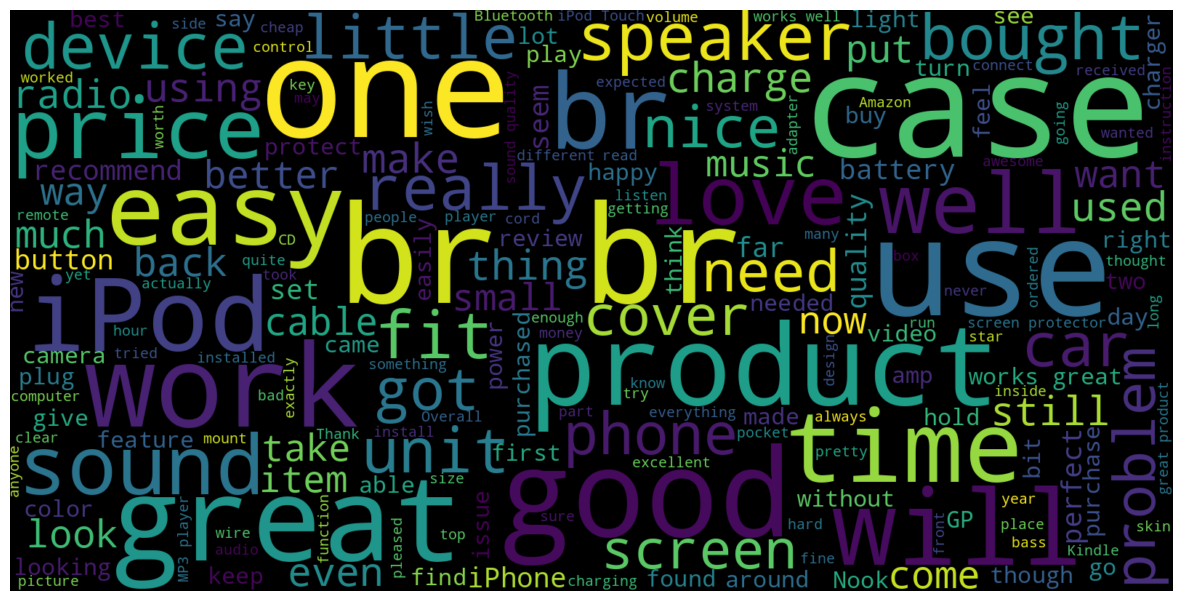

In [16]:
consolidated = ' '.join(word for word in data['Review']
[data['Sentiment']==1].astype(str))
wordcloud=WordCloud(width=1600, height=800, max_font_size=200).generate(consolidated)
plt.figure(figsize=(15,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
cv = TfidfVectorizer(max_features=2500)
x = cv.fit_transform(data['Review']).toarray()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, data['Sentiment'], test_size=0.25, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

model.fit(x_train,y_train)

pred=model.predict(x_test)

print(accuracy_score(y_test,pred))



0.8312


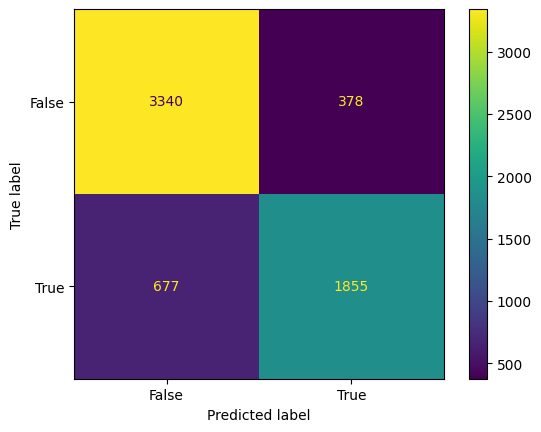

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

